i work here
i work here
i work here
i work here
Batch Size: 1, Learning Rate: 0.001


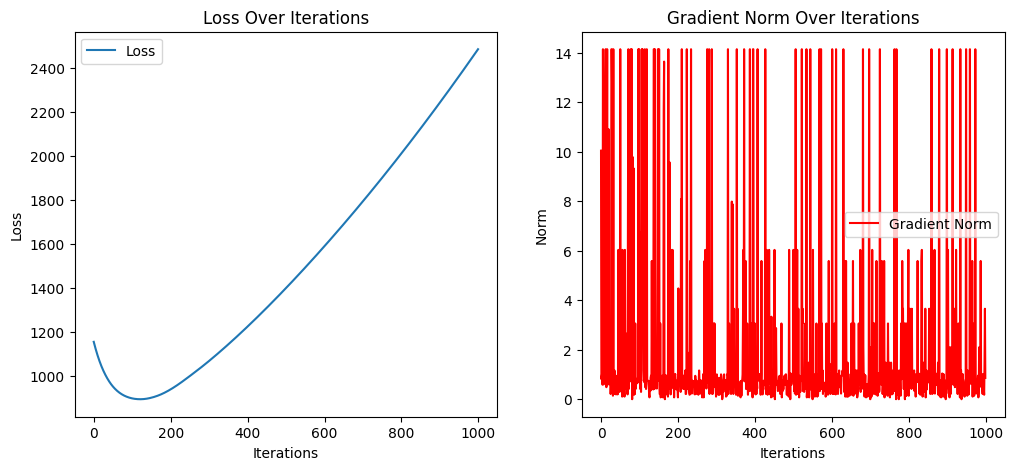

Batch Mean: -3.1195495359480795e-16, Batch Covariance: 0
Final W: [-42.2747449   27.36682405]
Batch Size: 1, Learning Rate: 0.005


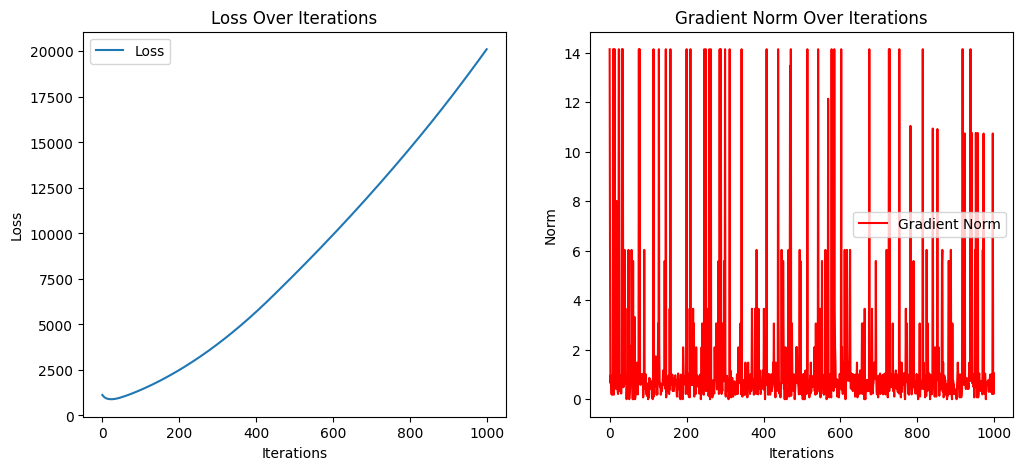

Batch Mean: -3.237658368355011e-16, Batch Covariance: 0
Final W: [-129.09843145   59.65811533]
Batch Size: 1, Learning Rate: 0.01


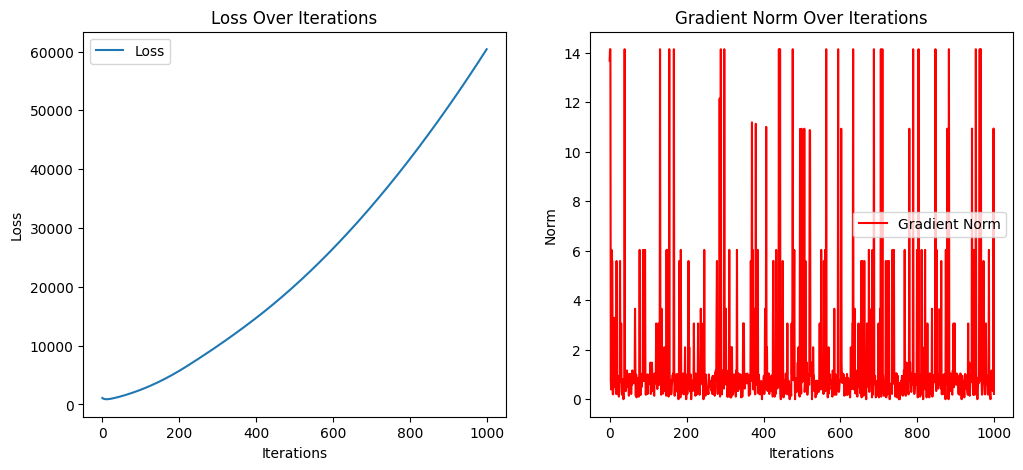

Batch Mean: -3.191891195797325e-16, Batch Covariance: 0
Final W: [-224.22114261  101.48944093]
Batch Size: 8, Learning Rate: 0.001


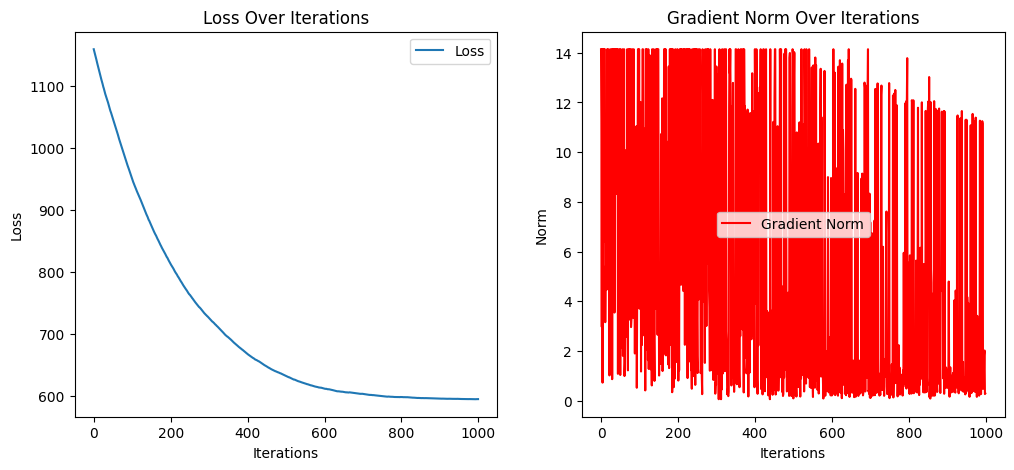

Batch Mean: 0.007453353529231562, Batch Covariance: 0.8500679775319574
Final W: [-20.19427497  14.58380926]
Batch Size: 8, Learning Rate: 0.005


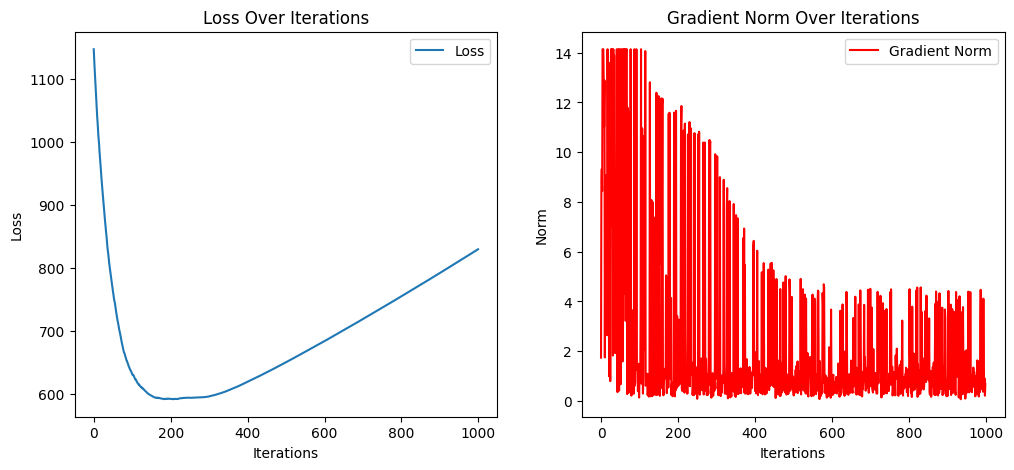

Batch Mean: 0.0058885371627879395, Batch Covariance: 0.8238668508990422
Final W: [-27.50438073   9.44479675]
Batch Size: 8, Learning Rate: 0.01


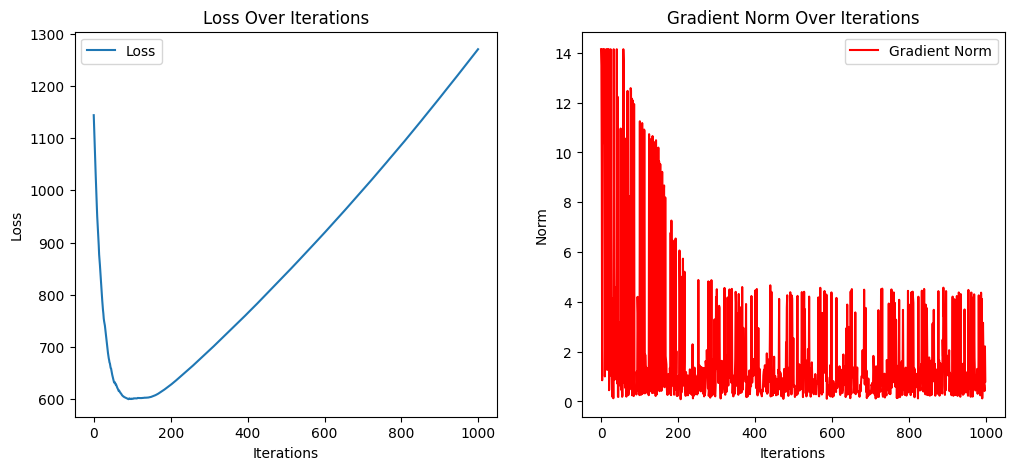

Batch Mean: -0.01152004491389715, Batch Covariance: 0.9561182429324715
Final W: [-34.14790353  11.09675953]
Batch Size: 20, Learning Rate: 0.001


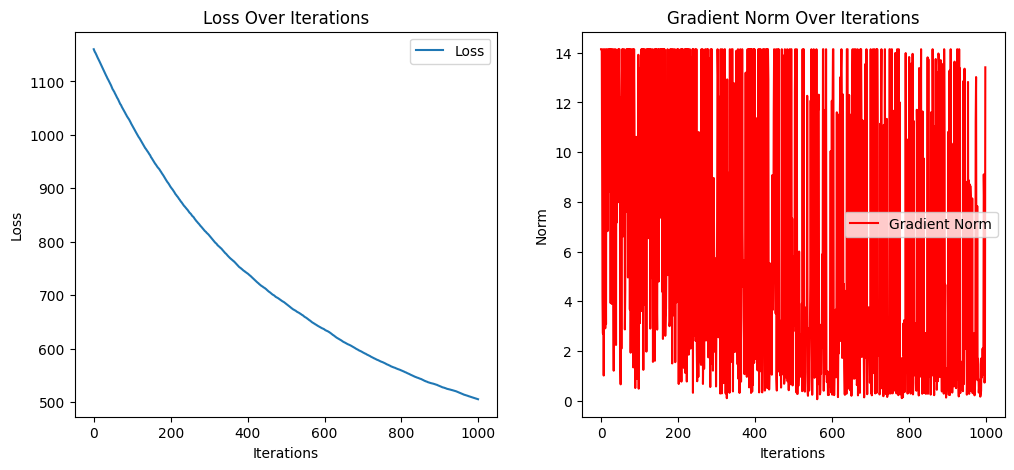

Batch Mean: -0.011992619456563115, Batch Covariance: 1.0614607267813512
Final W: [-14.75776841  17.86622294]
Batch Size: 20, Learning Rate: 0.005


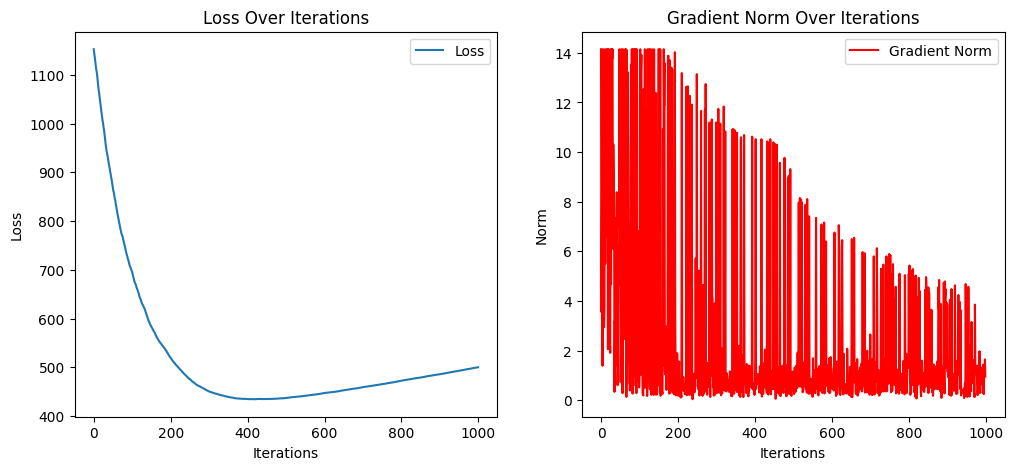

Batch Mean: -0.09438020114981881, Batch Covariance: 1.121404542399058
Final W: [-21.20075146   8.0035419 ]
Batch Size: 20, Learning Rate: 0.01


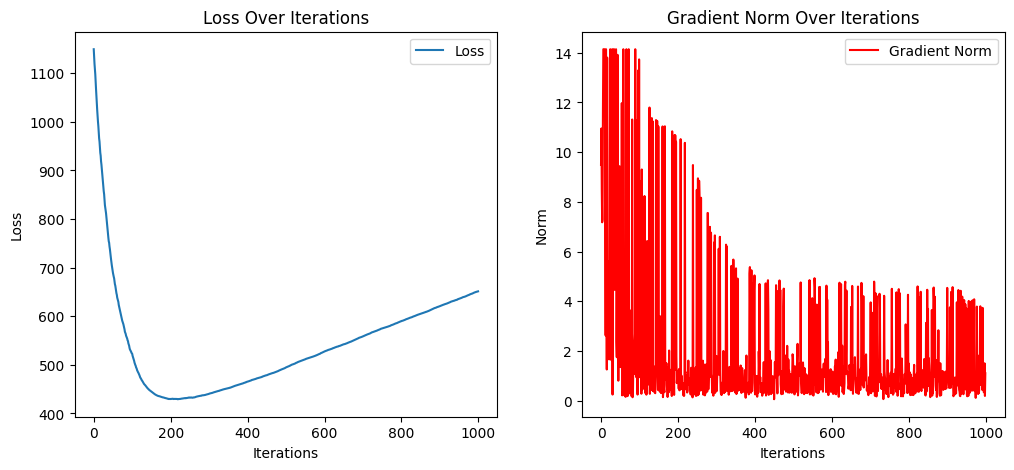

Batch Mean: 0.09785748946777773, Batch Covariance: 1.1506490303429262
Final W: [-24.35325052   8.52736646]
Batch Size: 50, Learning Rate: 0.001


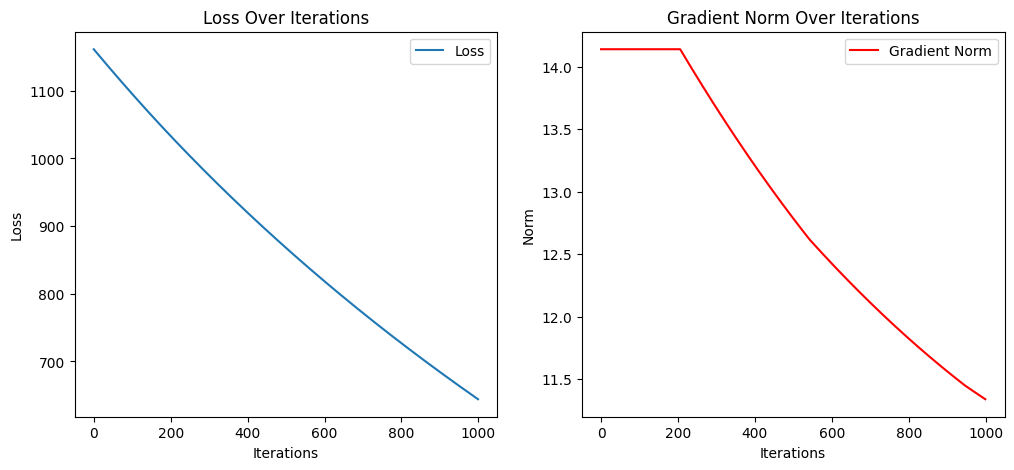

Batch Mean: -3.307047307394083e-16, Batch Covariance: 0.933299199063011
Final W: [-7.9911664 25.       ]
Batch Size: 50, Learning Rate: 0.005


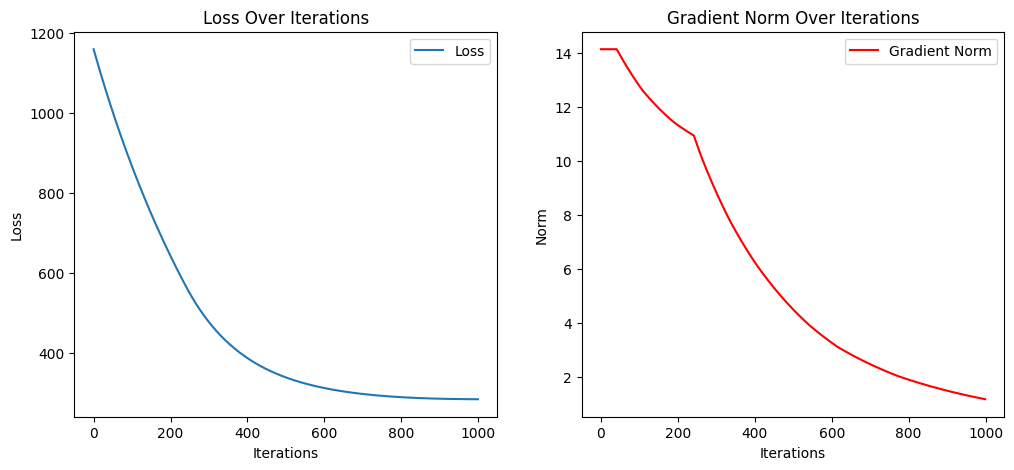

Batch Mean: -2.976342576654675e-16, Batch Covariance: 0.933299199063011
Final W: [-14.90637895   8.83863996]
Batch Size: 50, Learning Rate: 0.01


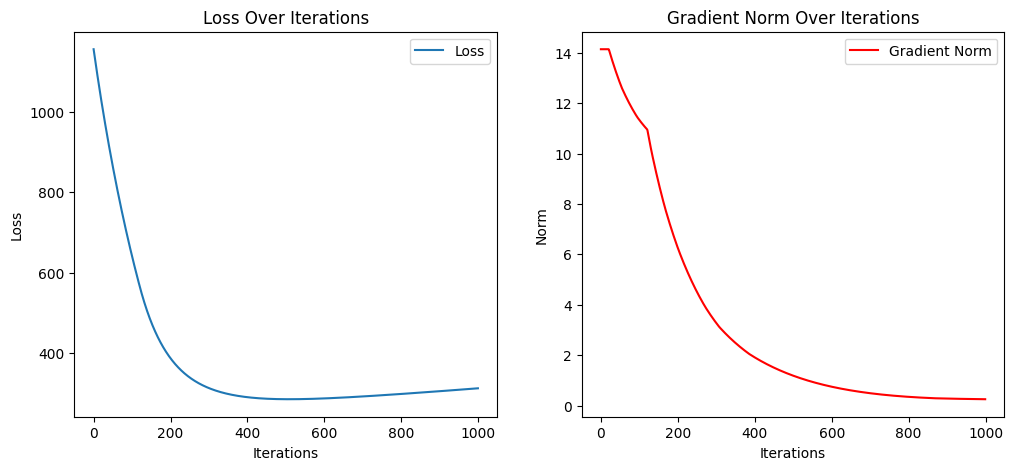

Batch Mean: -3.2598037744313107e-16, Batch Covariance: 0.933299199063011
Final W: [-16.58139361   7.0381477 ]
Batch Size: 100, Learning Rate: 0.001


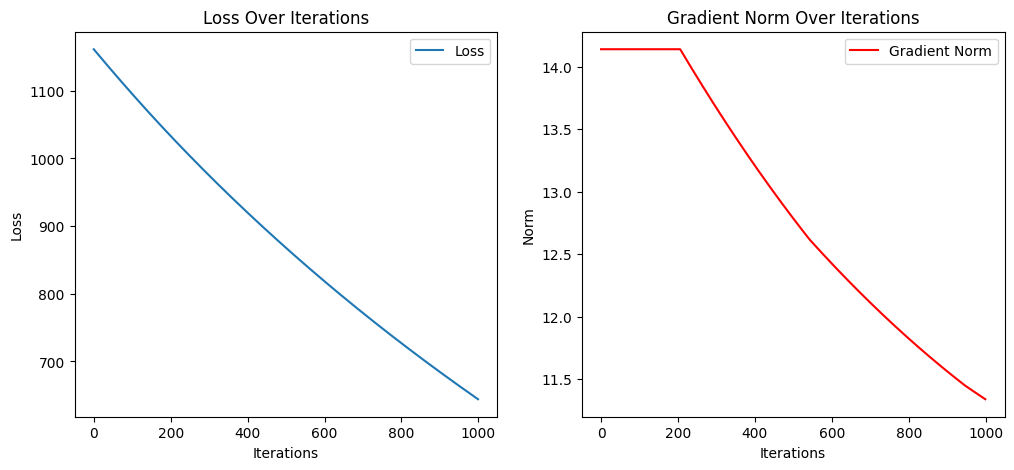

Batch Mean: -3.2243711247092313e-16, Batch Covariance: 0.9332991990630111
Final W: [-7.9911664 25.       ]
Batch Size: 100, Learning Rate: 0.005


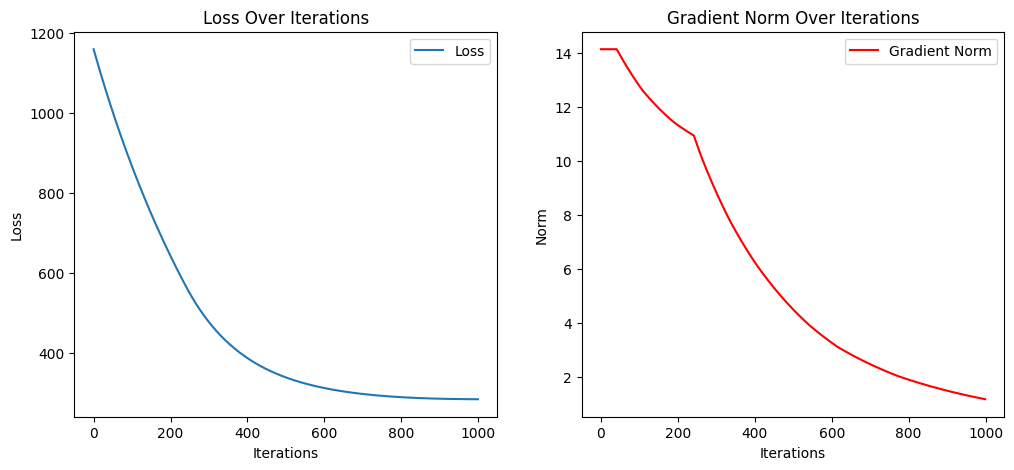

Batch Mean: -3.047207876098834e-16, Batch Covariance: 0.9332991990630113
Final W: [-14.90637895   8.83863996]
Batch Size: 100, Learning Rate: 0.01


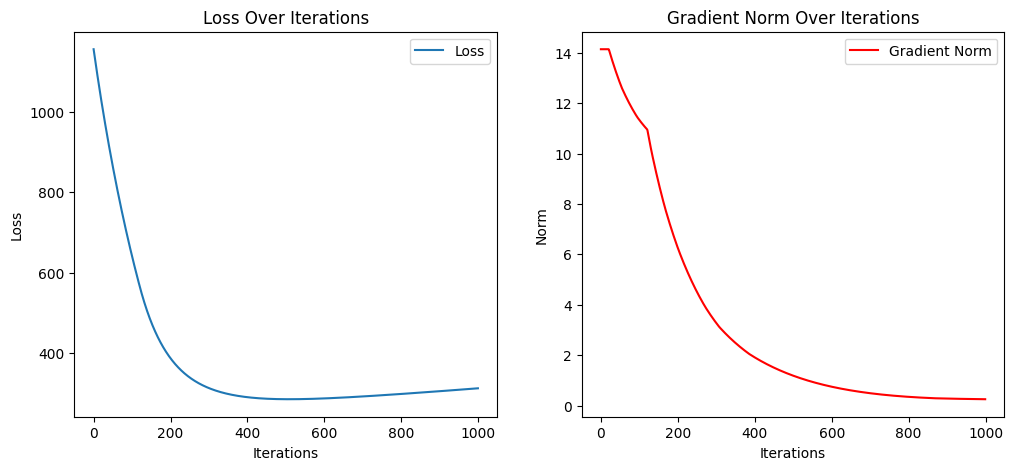

Batch Mean: -3.2125602414685383e-16, Batch Covariance: 0.9332991990630114
Final W: [-16.58139361   7.0381477 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('DIstanceTimeDataset - StudentsHomeTownDistance.csv')
df = df[['Time to Reach (hr)', 'Distance (km)']].dropna()

df['Time to Reach (hr)'] = pd.to_numeric(df['Time to Reach (hr)'], errors='coerce')
df['Distance (km)'] = pd.to_numeric(df['Distance (km)'], errors='coerce')
df = df.dropna()

df = df[df['Distance (km)'] > 0]

time = df['Time to Reach (hr)'].values.reshape(-1, 1)
distance = df['Distance (km)'].values.reshape(-1, 1)

def normalized_data(data):
    std_dev = np.std(data)
    return (data - np.mean(data)) / (std_dev if std_dev > 1e-8 else 1)

time = normalized_data(time)
distance = normalized_data(distance)

print("i work here")

def batch_data(x, y, size):
    idx = np.random.permutation(len(x))
    for i in range(0, len(x), size):
        if len(idx[i:i + size]) > 0:
            yield x[idx[i:i + size]], y[idx[i:i + size]]

print("i work here")

def batch_stats(x, y, batch_size):
    batch_means, batch_covs = [], []
    for xb, yb in batch_data(x, y, batch_size):
        if len(xb) > 0:
            batch_means.append(np.mean(xb))
            if len(xb) > 1:
                cov = np.cov(xb.flatten(), yb.flatten())
                if cov.shape == (2, 2):
                    batch_covs.append(cov[0, 1])
    return np.mean(batch_means) if batch_means else 0, np.mean(batch_covs) if batch_covs else 0

print("i work here")

def bgd(x, y, lr=0.01, it=1000, batch_size=8):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    W = np.array([[0.0], [35.0]])
    losses, norms = [], []

    for i in range(it):
        for xb, yb in batch_data(x, y, batch_size):
            if len(xb) == 0 or len(yb) == 0:
                continue
            y_pred = xb @ W
            y_pred = np.maximum(y_pred, 0)
            error = y_pred - yb
            dW = xb.T @ error / (len(yb) if len(yb) > 0 else 1)

            dW = np.clip(dW, -10, 10)
            W -= lr * dW

        loss = np.mean((x @ W - y) ** 2)
        grad_norm = np.linalg.norm(dW)
        losses.append(loss)
        norms.append(grad_norm)

    return W, losses, norms


def plot_metrics(losses, norms):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].plot(losses, label='Loss')
    ax[0].set_title('Loss Over Iterations')
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(norms, label='Gradient Norm', color='r')
    ax[1].set_title('Gradient Norm Over Iterations')
    ax[1].set_xlabel('Iterations')
    ax[1].set_ylabel('Norm')
    ax[1].legend()

    plt.show()
print("i work here")
x, y = time, distance
b_sizes = [1, 8, 20, 50, 100]
l_rates = [0.001, 0.005, 0.01]

for b in b_sizes:
    for lr in l_rates:
        print(f'Batch Size: {b}, Learning Rate: {lr}')
        W, losses, norms = bgd(x, y, lr=lr, batch_size=b)
        if len(losses) > 0 and len(norms) > 0:
            plot_metrics(losses, norms)
            mean_batch, cov_batch = batch_stats(x, y, b)
            print(f'Batch Mean: {mean_batch}, Batch Covariance: {cov_batch}')
            print(f'Final W: {W.ravel()}')
        else:
            print("Training failed due to NaN values.")


# Problem Statement: Missing Data Prediction and Analysis

You are provided with a dataset ([DSAICourseInterestRelevanceSurvey.xlsx](https://docs.google.com/spreadsheets/d/1oUyjxtFn_TmuQZkaJqEfISq4RTX9MVNuQUx2YbuMTHM/edit?gid=0#gid=0)) containing survey responses about student interest and courses. Your task is to simulate the scenario of missing data and build a model to predict those missing values.

Tasks:

Data Preprocessing:
Experiment with missing data percentages ranging from 20% to 80%.

Model Building:
Write a algorithms such that it predicts the missing values(e.g., Linear Regression).

Evaluation and Visualization:
Calculate the Mean Squared Error (MSE) to evaluate the accuracy of your predictions. The MSE measures the average squared difference between the actual and predicted values.
Create a plot to visualize the relationship between the actual and predicted values.


Testing with 20.0% missing data
Mean Squared Error: 0.0


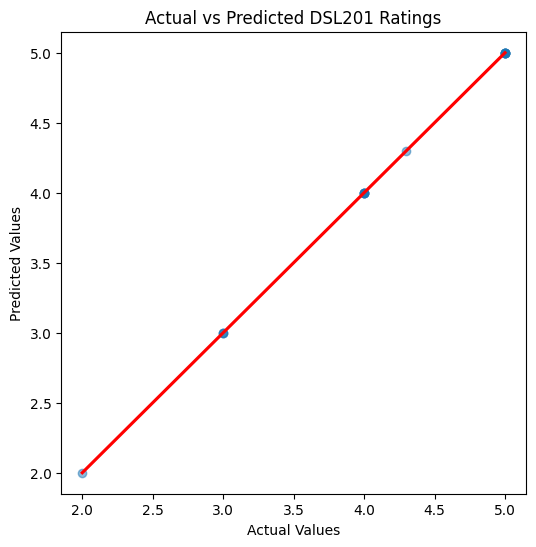


Testing with 40.0% missing data
Mean Squared Error: 0.0


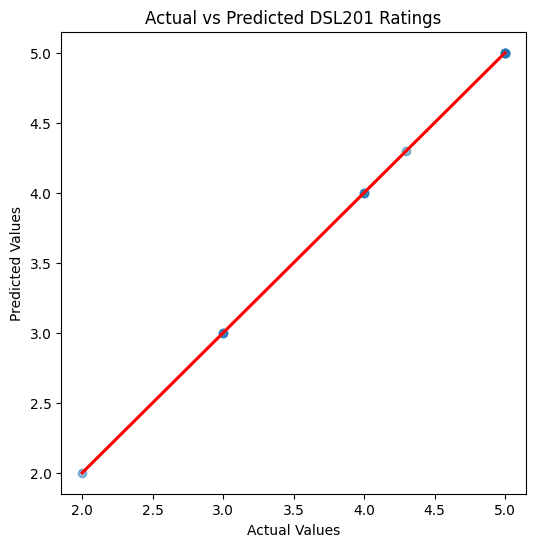


Testing with 60.0% missing data
Mean Squared Error: 0.0


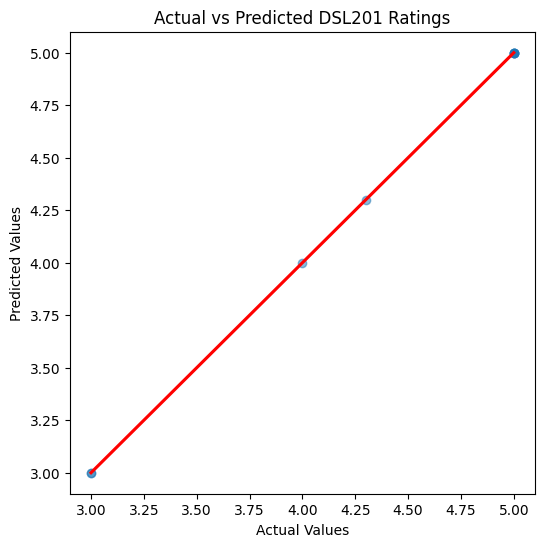


Testing with 80.0% missing data
Mean Squared Error: 0.0


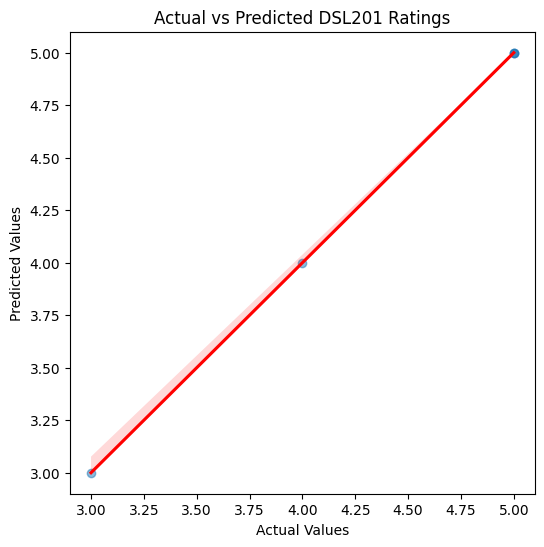

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

def preprocess_data(file_path, missing_percentage):
    df = pd.read_csv(file_path)
    cs_courses = ['CSL100', 'CSL201', 'CSL202', 'DSL201']
    df_subset = df[cs_courses].copy()

    np.random.seed(42)
    missing_count = int(missing_percentage * len(df_subset))
    missing_indices = np.random.choice(df_subset.index, size=missing_count, replace=False)
    df_subset.loc[missing_indices, 'DSL201'] = np.nan
    return df_subset

def predict_missing_values(df):
    cs_courses = ['CSL100', 'CSL201', 'CSL202']
    for index in df[df['DSL201'].isna()].index:

        valid_corr = df[cs_courses].corrwith(df['DSL201'], method='pearson', drop=True)
        top_3_corr = valid_corr.abs().nlargest(3).index

        weights = valid_corr[top_3_corr].abs()
        weighted_avg = np.average(df.loc[index, top_3_corr], weights=weights)

        df.at[index, 'DSL201'] = round(weighted_avg)
    return df

def evaluate_predictions(original_df, predicted_df):
    non_missing_indices = original_df['DSL201'].dropna().index
    mse = mean_squared_error(original_df.loc[non_missing_indices, 'DSL201'], predicted_df.loc[non_missing_indices, 'DSL201'])
    return mse

def visualize_predictions(original_df, predicted_df):
    non_missing_indices = original_df['DSL201'].dropna().index
    actual = original_df.loc[non_missing_indices, 'DSL201']
    predicted = predicted_df.loc[non_missing_indices, 'DSL201']

    plt.figure(figsize=(6, 6))
    sns.regplot(x=actual, y=predicted, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted DSL201 Ratings")
    plt.show()

file_path = "/content/DSAICourseInterestRelevanceSurvey - Original (1).csv"
missing_percentages = [0.2, 0.4, 0.6, 0.8]

for missing_percentage in missing_percentages:
    print(f"\nTesting with {missing_percentage*100}% missing data")
    df = preprocess_data(file_path, missing_percentage)
    predicted_df = predict_missing_values(df.copy())

    mse = evaluate_predictions(df, predicted_df)
    print("Mean Squared Error:", mse)
    visualize_predictions(df, predicted_df)
